In [1]:
import matplotlib.pyplot as plt 
import networkx as nx 
from networkx.algorithms.community.centrality import girvan_newman

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]


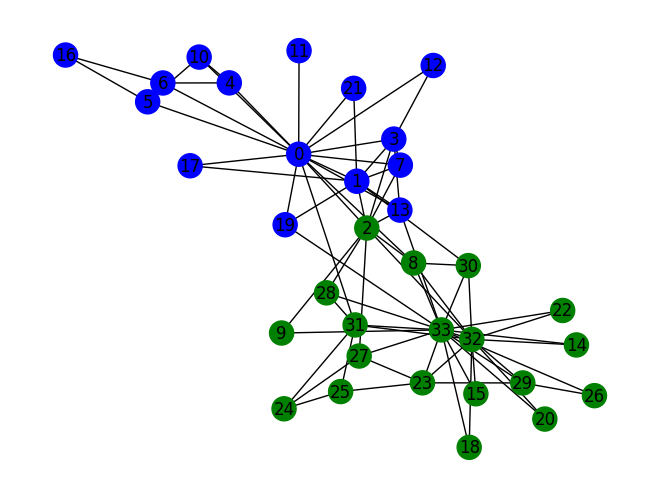

In [43]:
G = nx.karate_club_graph()
communities = girvan_newman(G)

node_groups = []
for com in next(communities):
    node_groups.append(list(com))

print (node_groups)

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else:
        color_map.append('green')
nx.draw(G, node_color=color_map, with_labels=True) 
plt. show()

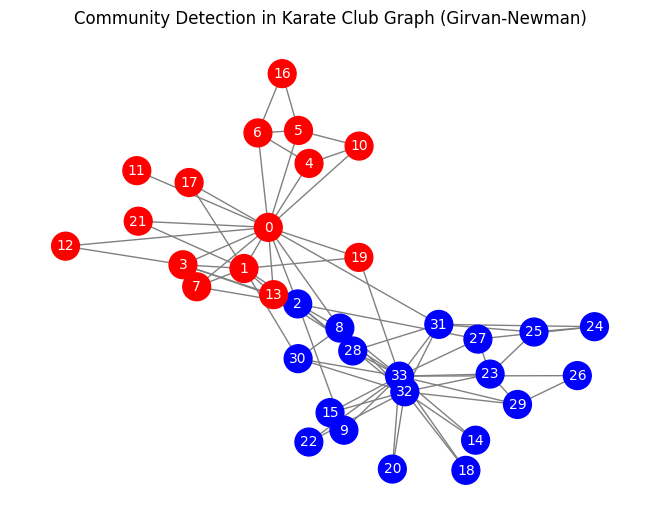

In [44]:
# Apply the Girvan-Newman community detection algorithm
communities = girvan_newman(G)
top_level_communities = next(communities)
community_list = [list(c) for c in top_level_communities]

# Assign a color to each community
color_map = {}
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan']
for idx, community in enumerate(community_list):
    for node in community:
        color_map[node] = colors[idx % len(colors)]  # cycle through colors

# Generate node colors
node_colors = [color_map[node] for node in G.nodes()]

# Draw the graph with improved layout
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G, pos,
    node_color=node_colors,
    with_labels=True,
    edge_color='gray',
    node_size=400,
    font_size=10,
    font_color='white'
)

plt.title("Community Detection in Karate Club Graph (Girvan-Newman)")
plt.show()

In [45]:
from networkx.algorithms.community import kernighan_lin_bisection

2, 3, 4,

In [46]:
kl_communities = kernighan_lin_bisection(G)
print("Kernighan-Lin Communities:")
print(kl_communities)

Kernighan-Lin Communities:
({0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31})


In [47]:
from networkx.algorithms.community import louvain_communities

# Compute Louvain communities using built-in function
lv_communities = louvain_communities(G, seed=42)  # optional seed for reproducibility

# Convert to list of lists (already in correct format)
print("Louvain Communities:")
print(lv_communities)

Louvain Communities:
[{1, 2, 3, 7, 12, 13}, {0, 4, 5, 6, 10, 11, 16, 17, 19, 21}, {24, 25, 28, 31}, {32, 33, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30}]


In [48]:
from networkx.algorithms.community import label_propagation_communities

lp_communities = list(label_propagation_communities(G))
print("Label Propagation Communities:")
print(lp_communities)

Label Propagation Communities:
[{0, 1, 3, 4, 7, 10, 11, 12, 13, 17, 19, 21, 24, 25, 31}, {32, 33, 2, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 28, 29, 30}, {16, 5, 6}]


In [49]:
from networkx.algorithms.community.quality import modularity

5,

In [50]:
def coverage(graph, communities):
    intra_edges = sum(graph.subgraph(c).size() for c in communities)
    total_edges = graph.size()
    return intra_edges / total_edges if total_edges > 0 else 0

def performance(graph, communities):
    n = graph.order()
    intra_edges = sum(graph.subgraph(c).size() for c in communities)
    inter_non_edges = sum(
        len(set(c1).intersection(set(c2))) == 0 
        for i, c1 in enumerate(communities) 
        for c2 in communities[i+1:]
    ) * (len(graph) * (len(graph) - 1) / 2 - graph.size())
    total_possible = n * (n - 1) / 2
    return (intra_edges + inter_non_edges) / total_possible if total_possible > 0 else 0

def evaluate_community_quality(G, communities):
    return {
        "modularity": modularity(G, communities),
        "coverage": coverage(G, communities),
        "performance": performance(G, communities)
    }

quality_scores = {
    "Girvan-Newman": evaluate_community_quality(G, community_list),
    "Kernighan–Lin": evaluate_community_quality(G, kl_communities),
    "Louvain": evaluate_community_quality(G, lv_communities),
    "Label Propagation": evaluate_community_quality(G, lp_communities),
}
print("Community Quality Scores:")
for method, scores in quality_scores.items():
    print(f"{method}: {scores}")

Community Quality Scores:
Girvan-Newman: {'modularity': 0.3476602762317048, 'coverage': 0.8717948717948718, 'performance': 0.982174688057041}
Kernighan–Lin: {'modularity': 0.3998332115215232, 'coverage': 0.8717948717948718, 'performance': 0.982174688057041}
Louvain: {'modularity': 0.42662243960945256, 'coverage': 0.6923076923076923, 'performance': 5.262032085561497}
Label Propagation: {'modularity': 0.30948632896684847, 'coverage': 0.7692307692307693, 'performance': 2.6898395721925135}


6,

In [51]:
import time
from networkx.algorithms.community import girvan_newman, kernighan_lin_bisection, label_propagation_communities

# --- Custom performance metric ---
def performance(G, communities):
    community_map = {}
    for i, community in enumerate(communities):
        for node in community:
            community_map[node] = i

    intra_or_inter = 0
    total_pairs = 0
    nodes = list(G.nodes())
    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            u, v = nodes[i], nodes[j]
            same_comm = community_map[u] == community_map[v]
            edge = G.has_edge(u, v)
            if (same_comm and edge) or (not same_comm and not edge):
                intra_or_inter += 1
            total_pairs += 1

    return intra_or_inter / total_pairs if total_pairs > 0 else 0

# --- Evaluation function ---
def evaluate_community_quality(G, communities):
    return {
        "modularity": nx.algorithms.community.modularity(G, communities),
        "performance": performance(G, communities)
    }

# --- Timed detection wrapper ---
def timed(func):
    start = time.time()
    result = func()
    duration = time.time() - start
    return result, duration

# --- Community Detection Methods ---
G = nx.karate_club_graph()

# 1. Girvan–Newman
def detect_girvan_newman():
    communities = next(girvan_newman(G))
    return [list(c) for c in communities]

# 2. Kernighan–Lin (Ratio Cut)
def detect_kl():
    communities = kernighan_lin_bisection(G)
    return [list(c) for c in communities]

# 3. Louvain
def detect_louvain():
    communities = louvain_communities(G, seed=42)  # reproducible
    return [list(c) for c in communities]

# 4. Label Propagation
def detect_label_prop():
    return [list(c) for c in label_propagation_communities(G)]

# --- Execute all and store results ---
detection_methods = {
    "Girvan-Newman": detect_girvan_newman,
    "Kernighan–Lin": detect_kl,
    "Louvain": detect_louvain,
    "Label Propagation": detect_label_prop
}

quality_scores = {}
execution_times = {}

for name, func in detection_methods.items():
    communities, duration = timed(func)
    quality = evaluate_community_quality(G, communities)
    quality_scores[name] = quality
    execution_times[name] = duration

# --- Output Results ---
print("Community Quality Scores:")
for name, scores in quality_scores.items():
    print(f"{name}: {scores}")

print("\nExecution Times (seconds):")
for name, t in execution_times.items():
    print(f"{name}: {t:.6f}")


Community Quality Scores:
Girvan-Newman: {'modularity': 0.3476602762317048, 'performance': 0.6114081996434938}
Kernighan–Lin: {'modularity': 0.3998332115215232, 'performance': 0.6185383244206774}
Louvain: {'modularity': 0.42662243960945256, 'performance': 0.7736185383244206}
Label Propagation: {'modularity': 0.30948632896684847, 'performance': 0.6684491978609626}

Execution Times (seconds):
Girvan-Newman: 0.022960
Kernighan–Lin: 0.001005
Louvain: 0.001009
Label Propagation: 0.000000


7,

In [52]:
avg_path_len = nx.average_shortest_path_length(G)
print("Average Path Length:", avg_path_len)

Average Path Length: 2.408199643493761


8,

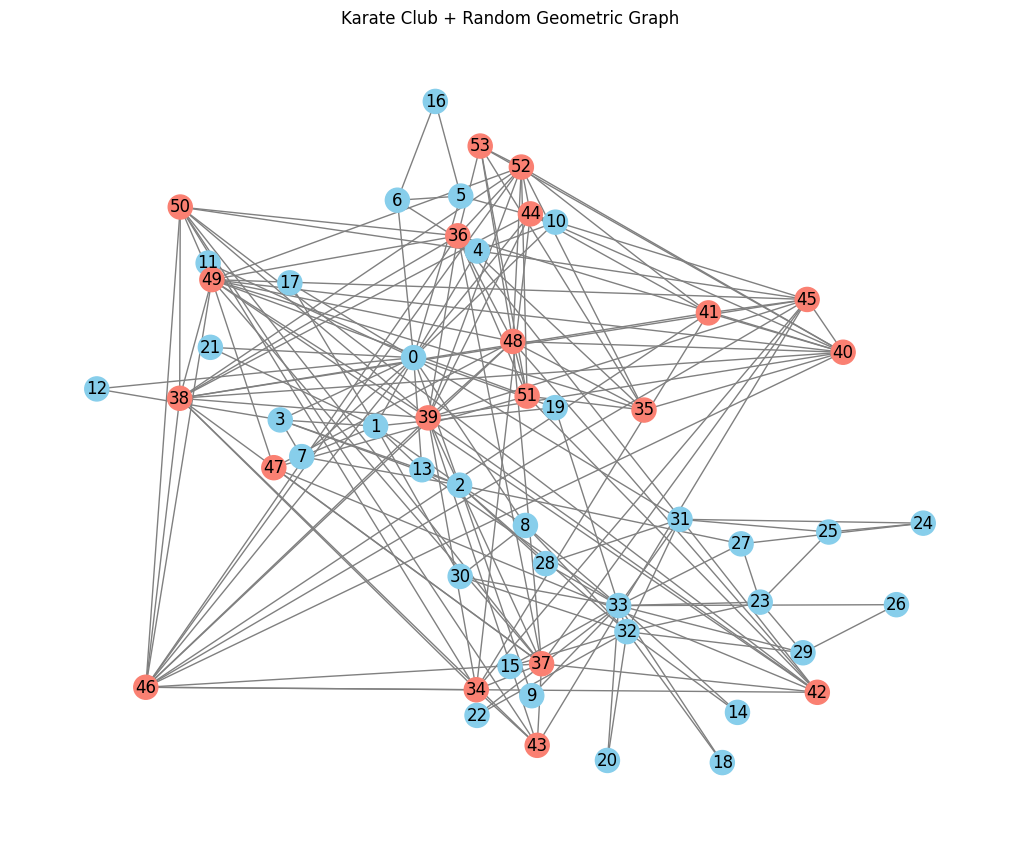

In [53]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Load Karate graph
G = nx.karate_club_graph()

# Assign 2D layout positions to karate nodes
karate_pos = nx.spring_layout(G, seed=42)

# Find bounds of Karate node positions
x_vals, y_vals = zip(*karate_pos.values())
xmin, xmax = min(x_vals), max(x_vals)
ymin, ymax = min(y_vals), max(y_vals)

# Generate 20 random nodes in same bounding box
G_random = nx.random_geometric_graph(20, radius=0.5)
offset = max(G.nodes()) + 1
mapping = {n: n + offset for n in G_random.nodes}
G_random = nx.relabel_nodes(G_random, mapping)

# Generate random positions within karate bounding box
random_pos = {
    n: (
        np.random.uniform(xmin, xmax),
        np.random.uniform(ymin, ymax)
    ) for n in G_random.nodes
}

# Combine graphs
combined = nx.compose(G, G_random)

# Combine positions
positions = {**karate_pos, **random_pos}

# Color nodes
node_colors = ['skyblue' if n in G else 'salmon' for n in combined.nodes()]

# Draw
plt.figure(figsize=(10, 8))
nx.draw(combined, pos=positions, node_color=node_colors, with_labels=True, edge_color='gray')
plt.title("Karate Club + Random Geometric Graph")
plt.show()


Community Quality Scores on Expanded Graph:
Girvan-Newman: {'modularity': 0.5666945007080755, 'performance': 0.8476589797344515}
Kernighan–Lin: {'modularity': 0.44217759999097267, 'performance': 0.6785464709993012}
Louvain: {'modularity': 0.5931923200613853, 'performance': 0.8497554157931516}
Label Propagation: {'modularity': 0.5262580328479302, 'performance': 0.870020964360587}

Execution Times on Expanded Graph (seconds):
Girvan-Newman: 0.071280
Kernighan–Lin: 0.000999
Louvain: 0.002000
Label Propagation: 0.000000


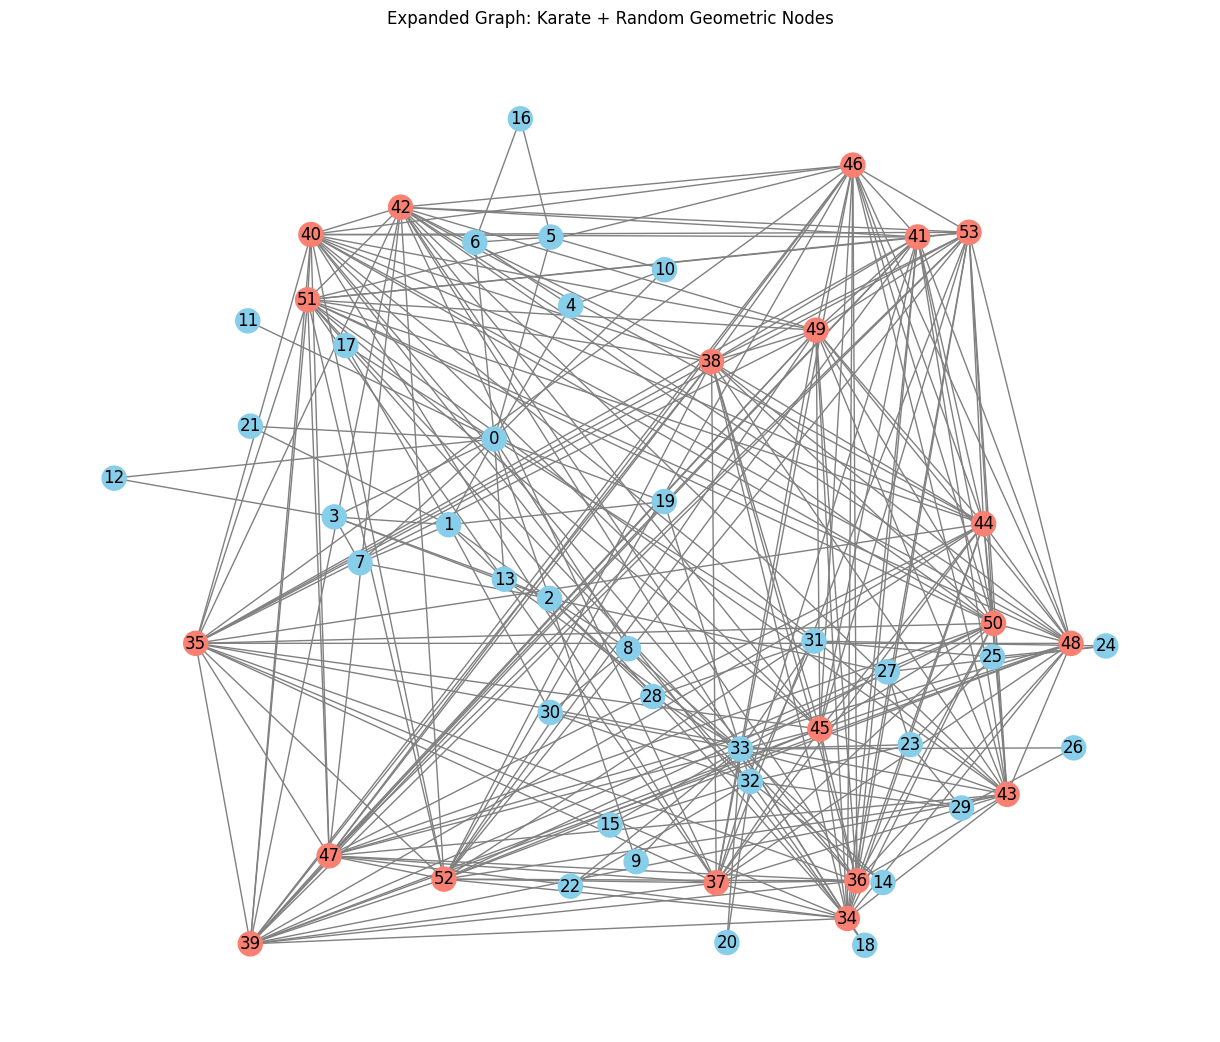

In [54]:
# --- Setup Karate Graph ---
G = nx.karate_club_graph()
karate_pos = nx.spring_layout(G, seed=42)

# Bounding box of Karate graph
x_vals, y_vals = zip(*karate_pos.values())
xmin, xmax = min(x_vals), max(x_vals)
ymin, ymax = min(y_vals), max(y_vals)

# --- Average Path Length (for edge radius threshold) ---
avg_path_len = nx.average_shortest_path_length(G)

# --- Generate Random Geometric Graph ---
G_random = nx.random_geometric_graph(20, radius=avg_path_len)
offset = max(G.nodes()) + 1
mapping = {n: n + offset for n in G_random.nodes}
G_random = nx.relabel_nodes(G_random, mapping)

# Assign random positions inside bounding box
random_pos = {
    n: (
        np.random.uniform(xmin, xmax),
        np.random.uniform(ymin, ymax)
    ) for n in G_random.nodes
}

# --- Combine Graphs ---
combined = nx.compose(G, G_random)
positions = {**karate_pos, **random_pos}

# --- Utility Functions ---
def performance(G, communities):
    community_map = {}
    for i, community in enumerate(communities):
        for node in community:
            community_map[node] = i
    intra_or_inter = 0
    total_pairs = 0
    nodes = list(G.nodes())
    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            u, v = nodes[i], nodes[j]
            same_comm = community_map[u] == community_map[v]
            edge = G.has_edge(u, v)
            if (same_comm and edge) or (not same_comm and not edge):
                intra_or_inter += 1
            total_pairs += 1
    return intra_or_inter / total_pairs if total_pairs > 0 else 0

def evaluate_community_quality(G, communities):
    return {
        "modularity": nx.algorithms.community.modularity(G, communities),
        "performance": performance(G, communities)
    }

def timed(func):
    start = time.time()
    result = func()
    duration = time.time() - start
    return result, duration

# --- Detection Functions for Combined Graph ---
def detect_girvan_newman_combined():
    communities = next(nx.algorithms.community.girvan_newman(combined))
    return [list(c) for c in communities]

def detect_kl_combined():
    communities = kernighan_lin_bisection(combined)
    return [list(c) for c in communities]

def detect_louvain_combined():
    communities = louvain_communities(combined, seed=42)  # reproducible
    return [list(c) for c in communities]

def detect_label_prop_combined():
    return [list(c) for c in nx.algorithms.community.label_propagation_communities(combined)]

# --- Run All 4 on Combined Graph ---
detection_methods_expanded = {
    "Girvan-Newman": detect_girvan_newman_combined,
    "Kernighan–Lin": detect_kl_combined,
    "Louvain": detect_louvain_combined,
    "Label Propagation": detect_label_prop_combined
}

quality_scores_expanded = {}
execution_times_expanded = {}

for name, func in detection_methods_expanded.items():
    communities, duration = timed(func)
    quality = evaluate_community_quality(combined, communities)
    quality_scores_expanded[name] = quality
    execution_times_expanded[name] = duration

# --- Output ---
print("Community Quality Scores on Expanded Graph:")
for name, scores in quality_scores_expanded.items():
    print(f"{name}: {scores}")

print("\nExecution Times on Expanded Graph (seconds):")
for name, t in execution_times_expanded.items():
    print(f"{name}: {t:.6f}")

# --- Optional: Draw Combined Graph ---
node_colors = ['skyblue' if n in G else 'salmon' for n in combined.nodes()]
plt.figure(figsize=(12, 10))
nx.draw(combined, pos=positions, node_color=node_colors, with_labels=True, edge_color='gray')
plt.title("Expanded Graph: Karate + Random Geometric Nodes")
plt.show()